In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
# Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
# Hp = Horse power of engine
# MPG = Miles per gallon
# VOL = Volume
# WT = Weight
# SP = Top speed of Car

In [13]:
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,NaN,89,104.185353,28.762059,53.700681
1,NaN,92,105.461264,30.466833,50.013401
2,NaN,92,105.461264,30.193597,50.013401
3,NaN,92,113.461264,30.632114,45.696322
4,NaN,92,104.461264,29.889149,50.504232


**Assumptions in Multilinear Regression**
1. **Linearity:** The relationship between the predictors(X) and the response (Y) is linear.
2. **Independence:** Observations are independent of each other.
3. **Homoscedasticity:** The residuals of the models are normally distributed.
4. **Normal Distribution of Errors:** The residuals (Y - Y_hat) exhibit constant
5. **No multicollinearity:** The independent variales should not be too highly correlated with each other.


 Violations of these assumptions may lead to inefficiency in the regression parameters and unreliable prediction

**EDA**

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      0 non-null      float64
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.3 KB


In [16]:
#check for missing values
cars.isna().sum()

HP     81
VOL     0
SP      0
WT      0
MPG     0
dtype: int64

**Observations about info(), missing values**
- There are no missing values
- There are 81 observations (81 different cars data)
- The data types of the columns are also relevant and valid


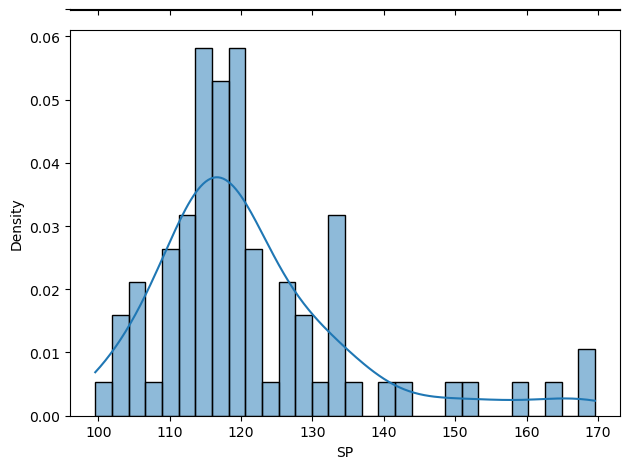

In [12]:
#create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15,85)})
#creating boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
#creating a histogram
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
#Adjust layout
plt.tight_layout()
plt.show()

**Observations from boxplot and histograms**
- There are some extreme values(outliers) observed in towards the right tail of SP and HP distibutons.
- In the VOL and WT columns, a few outliers are observed in both tails of their distributions
- The extreme values of cars data may have come from the specially designed nature of cars
- as this is multi-dimesnsional data, the outliers with repsect to spatial dimesnsions may have to be considered while building the regression model

**Checking for boxplot and histograms**

In [25]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


**Pair Plots and Correlation Coefficients**

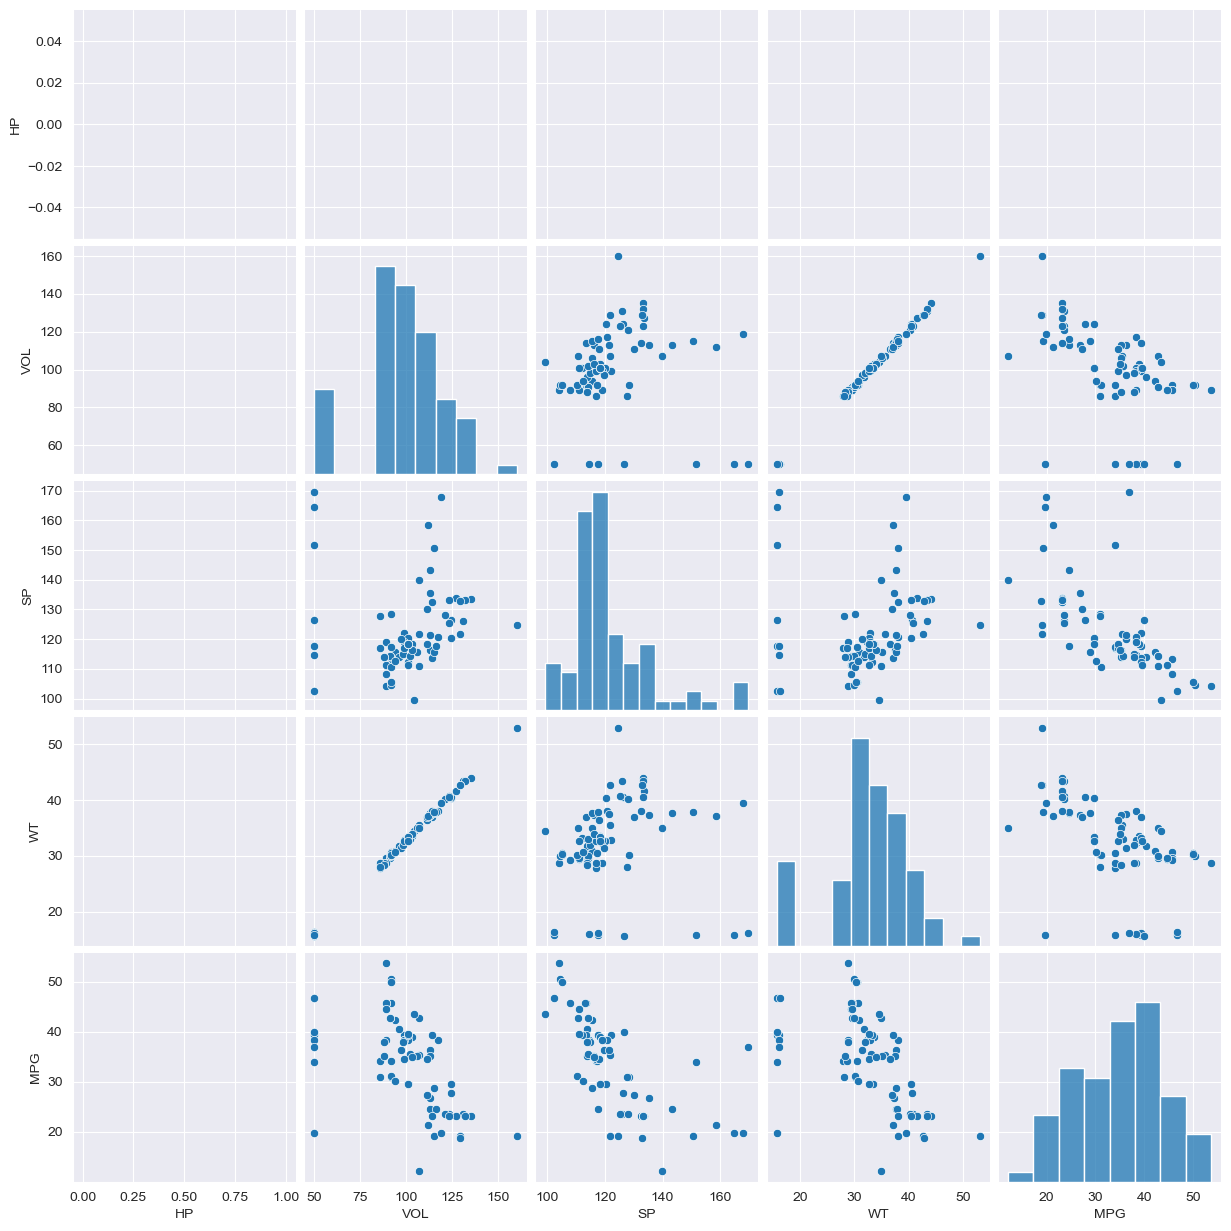

In [26]:
# pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [27]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,NaN,NaN,NaN,NaN,NaN
VOL,NaN,1.000000,0.102170,0.999203,-0.529057
SP,NaN,0.102170,1.000000,0.102439,-0.687125
WT,NaN,0.999203,0.102439,1.000000,-0.526759
MPG,NaN,-0.529057,-0.687125,-0.526759,1.000000


**Observations**
